In [4]:
import sys
import os
import matplotlib.pyplot as plt 


sys.path.append(os.path.abspath('../src'))

In [5]:
from networks import run_single_network, create_random_network
from utils import plot_raster, plot_adjacency_matrix


In [6]:
neurons, G = create_random_network(N=500, p_connect=0.1, weight_bounds=(0.1,5))

In [15]:
T_seconds = 1 

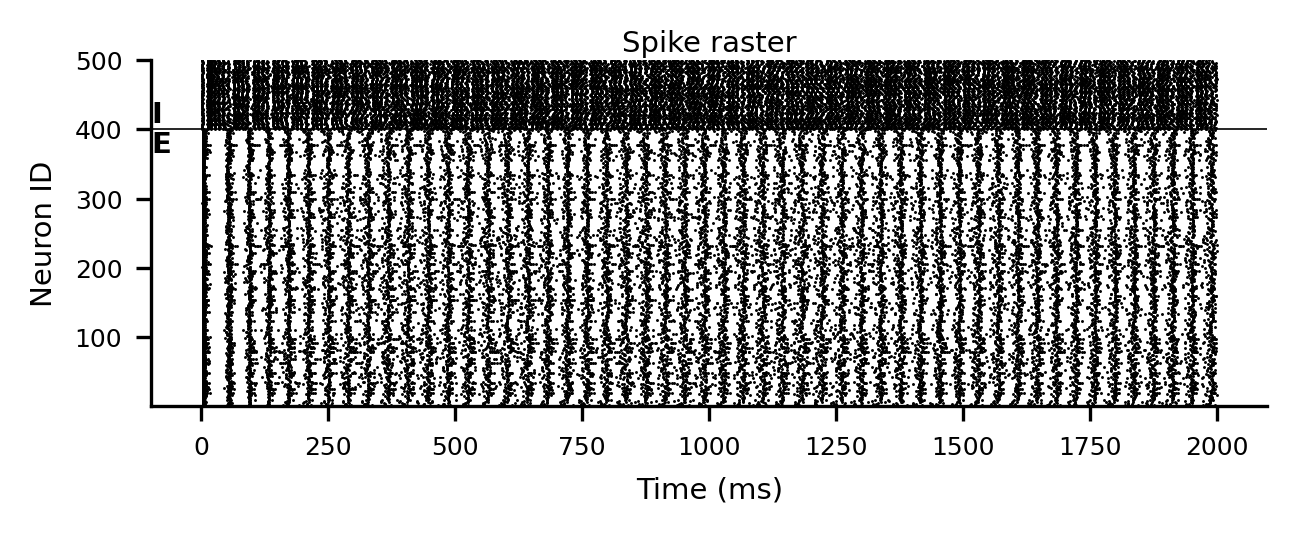

In [17]:
T =int( T_seconds* 2000)
V_hist, S_hist, I_syn_hist, I_ext, final_state, final_stdp_state = run_single_network(
    neurons, G, network_type='stdp_syn', T=T, nkey=32)
plot_raster(S_hist, neurons, final_state.W, T_total=T)
plt.show()

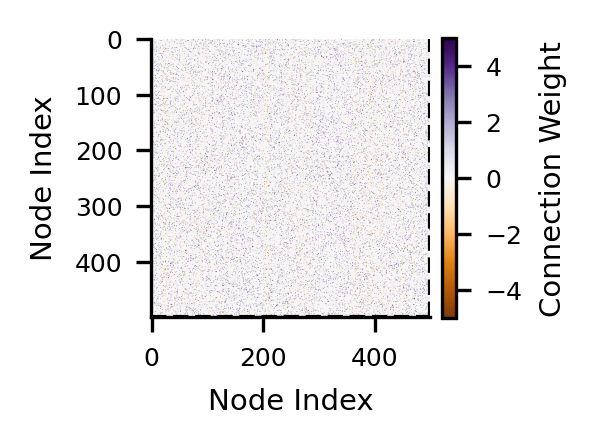

In [18]:
plot_adjacency_matrix(G, figsize=(2,2))
plt.show()

In [19]:
import infomeasure as im
import antropy as ant
import numpy as np 
from tqdm import tqdm 

In [20]:
im_args = {"approach": "miller_madow", "base": 2}


In [49]:
A = np.array(S_hist)
A.shape

(8000, 500)

In [36]:
im.entropy(A, **im_args)

np.float64(13.433150499718995)

100%|██████████| 601/601 [00:17<00:00, 34.05it/s]


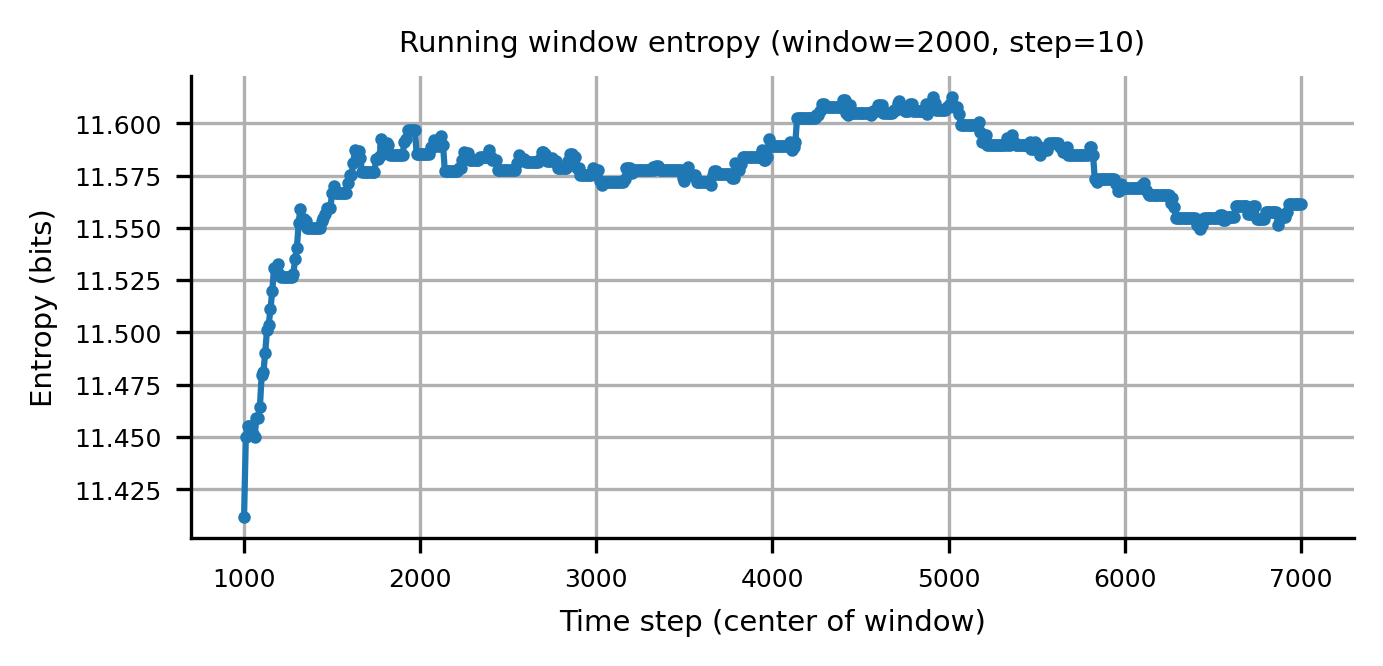

In [44]:
# Running window entropy
window_size = int(500/0.25)
step_size = 10

entropies = []
times = []

for start in tqdm(range(0, A.shape[0] - window_size + 1, step_size)):
    window = A[start:start+window_size]
    H = im.entropy(window, **im_args)
    entropies.append(H)
    times.append(start + window_size//2)

# Plot
plt.figure(figsize=(5,2))
plt.plot(times, entropies, marker='o', markersize=2)
plt.xlabel("Time step (center of window)")
plt.ylabel("Entropy (bits)")
plt.title(f"Running window entropy (window={window_size}, step={step_size})")
plt.grid(True)
plt.show()

In [69]:
def add_noise_in_window(A, a, b, p=0.01, seed=None):
    """
    Add noise to binary spike matrix A within timesteps [a, b).
    
    """
    rng = np.random.default_rng(seed)
    A_noisy = A.copy()
    
    mask = rng.random(size=A_noisy[a:b].shape) < p
    A_noisy[a:b][mask] = 1 - A_noisy[a:b][mask]
    
    return A_noisy

In [70]:
A_noisy = add_noise_in_window(A, 4000, 5000)

100%|██████████| 601/601 [00:16<00:00, 36.92it/s]


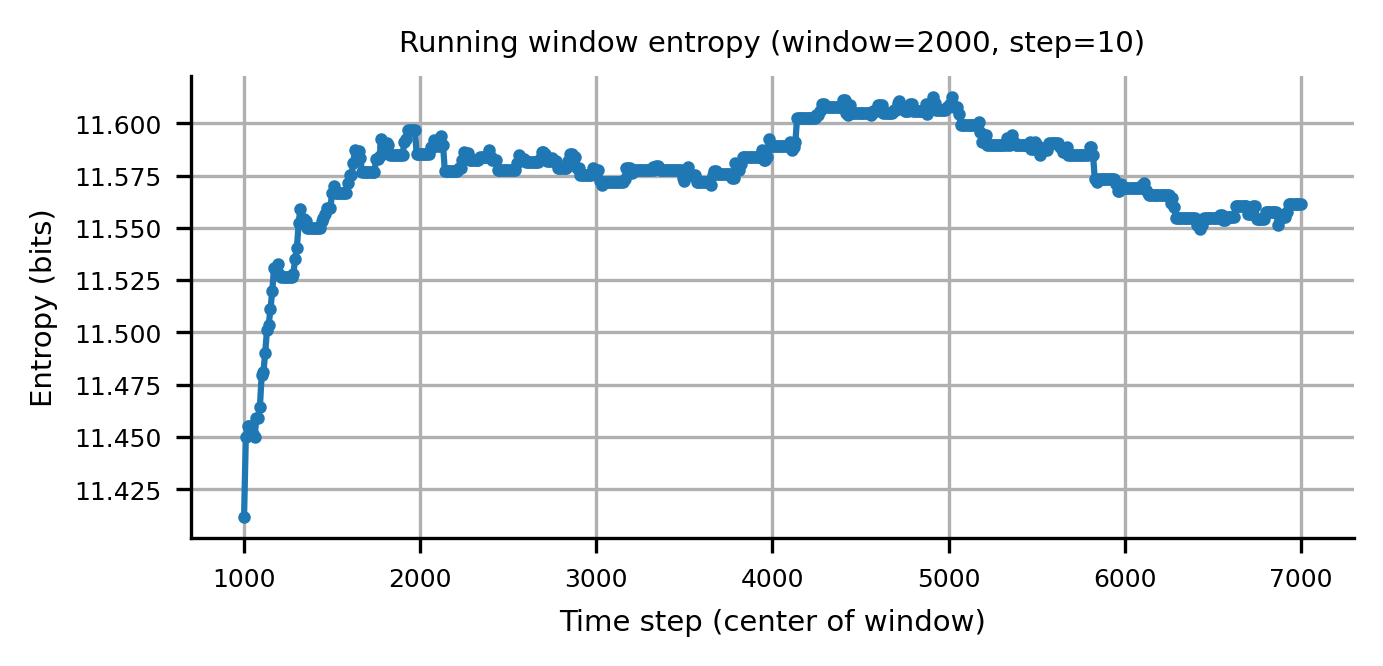

In [71]:
# Running window entropy
window_size = int(500/0.25)
step_size = 10

n_entropies = []
times = []

for start in tqdm(range(0, A.shape[0] - window_size + 1, step_size)):
    window = A_noisy[start:start+window_size]
    H = im.entropy(window, **im_args)
    n_entropies.append(H)
    times.append(start + window_size//2)

# Plot
plt.figure(figsize=(5,2))
plt.plot(times, entropies, marker='o', markersize=2)
plt.xlabel("Time step (center of window)")
plt.ylabel("Entropy (bits)")
plt.title(f"Running window entropy (window={window_size}, step={step_size})")
plt.grid(True)
plt.show()

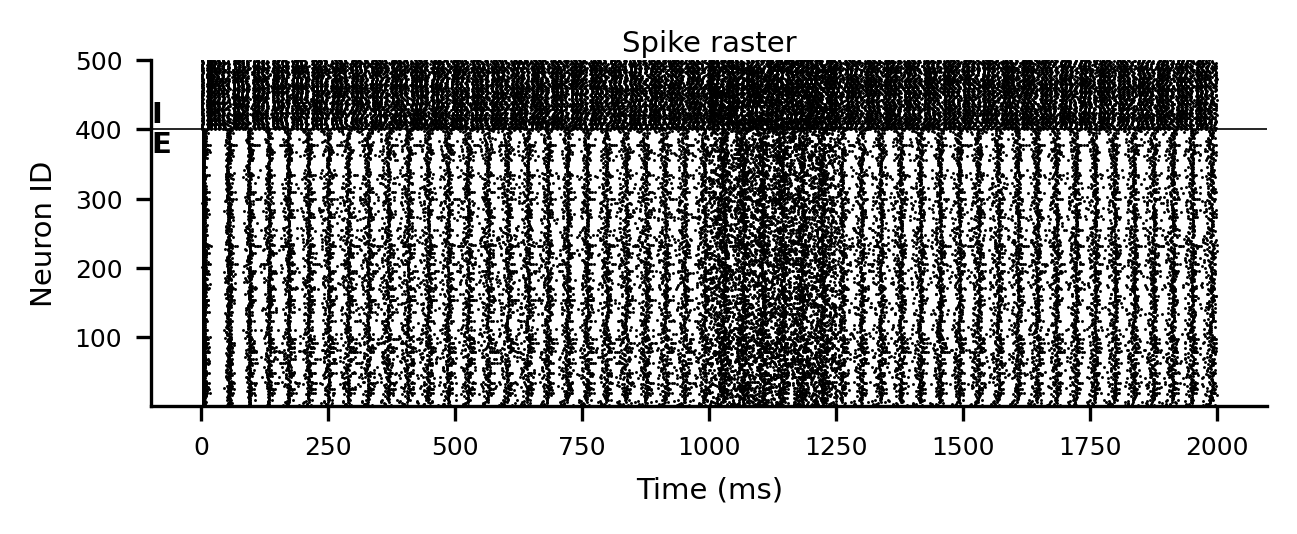

In [72]:
plot_raster(A_noisy, neurons, final_state.W, T_total=T)
plt.show()

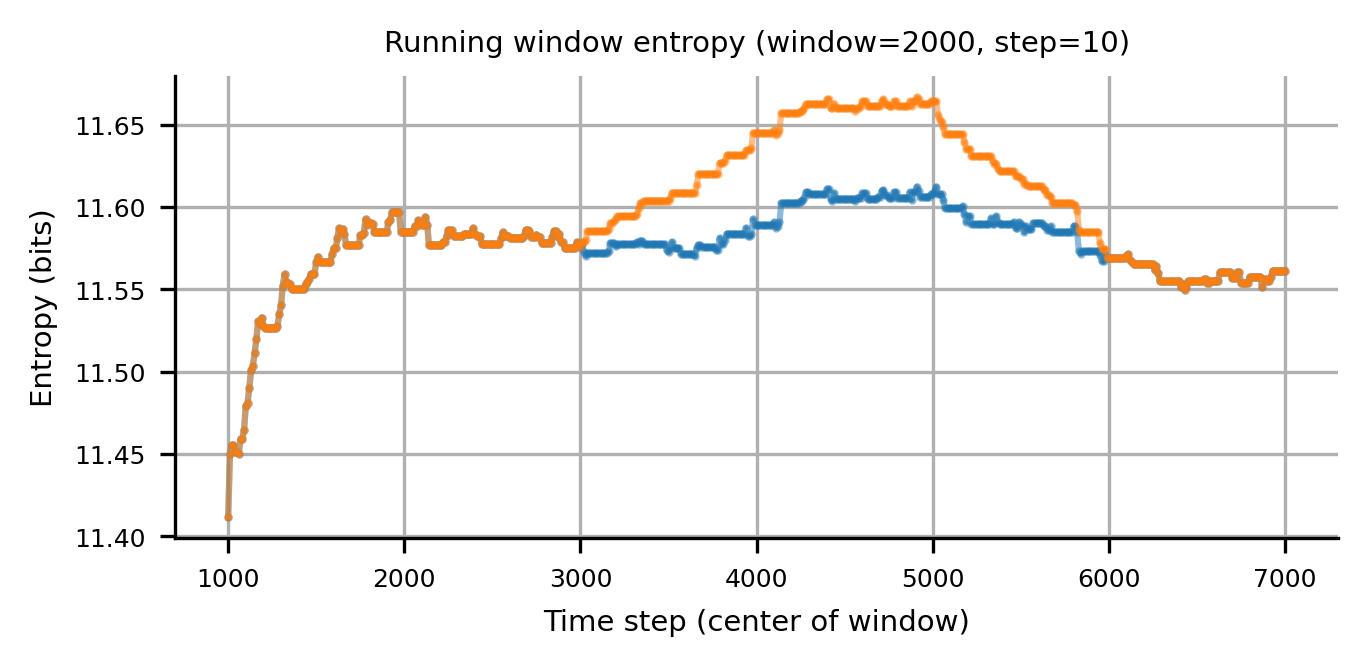

In [75]:
# Plot
plt.figure(figsize=(5,2))
plt.plot(times, entropies, marker='o', markersize=1, alpha=0.5)
plt.plot(times, n_entropies, marker='o', markersize=1, alpha=0.5)
plt.xlabel("Time step (center of window)")
plt.ylabel("Entropy (bits)")
plt.title(f"Running window entropy (window={window_size}, step={step_size})")
plt.grid(True)
plt.show()

In [77]:
def add_structured_noise(A, a, b, mode="silence", p=0.2, seed=None):

    rng = np.random.default_rng(seed)
    A_noisy = A.copy()
    segment = A_noisy[a:b]

    if mode == "silence":
        mask = (segment == 1) & (rng.random(segment.shape) < p)
        segment[mask] = 0
    elif mode == "burst":
        mask = (segment == 0) & (rng.random(segment.shape) < p)
        segment[mask] = 1
    else:
        raise ValueError("mode must be 'silence' or 'burst'")

    A_noisy[a:b] = segment
    return A_noisy



In [62]:
A_silenced = add_structured_noise(A, 4000, 5000)

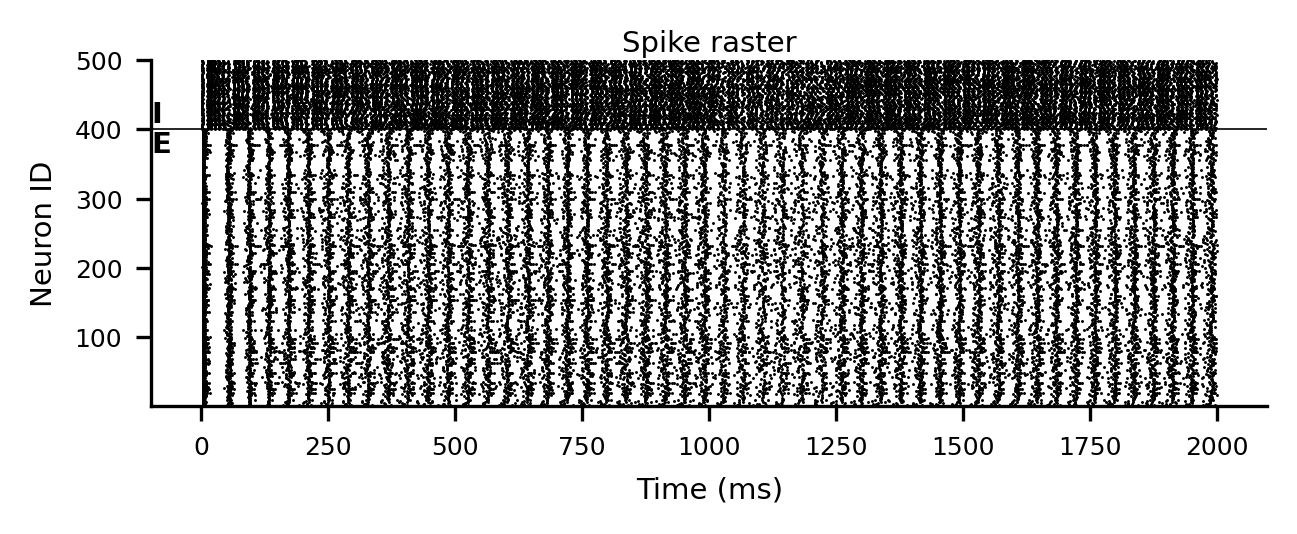

In [63]:
plot_raster(A_silenced, neurons, final_state.W, T_total=T)
plt.show()

In [64]:
# Running window entropy
window_size = int(500/0.25)
step_size = 10

s_entropies = []
times = []

for start in tqdm(range(0, A.shape[0] - window_size + 1, step_size)):
    window = A_silenced[start:start+window_size]
    H = im.entropy(window, **im_args)
    s_entropies.append(H)
    times.append(start + window_size//2)



100%|██████████| 601/601 [00:18<00:00, 32.90it/s]


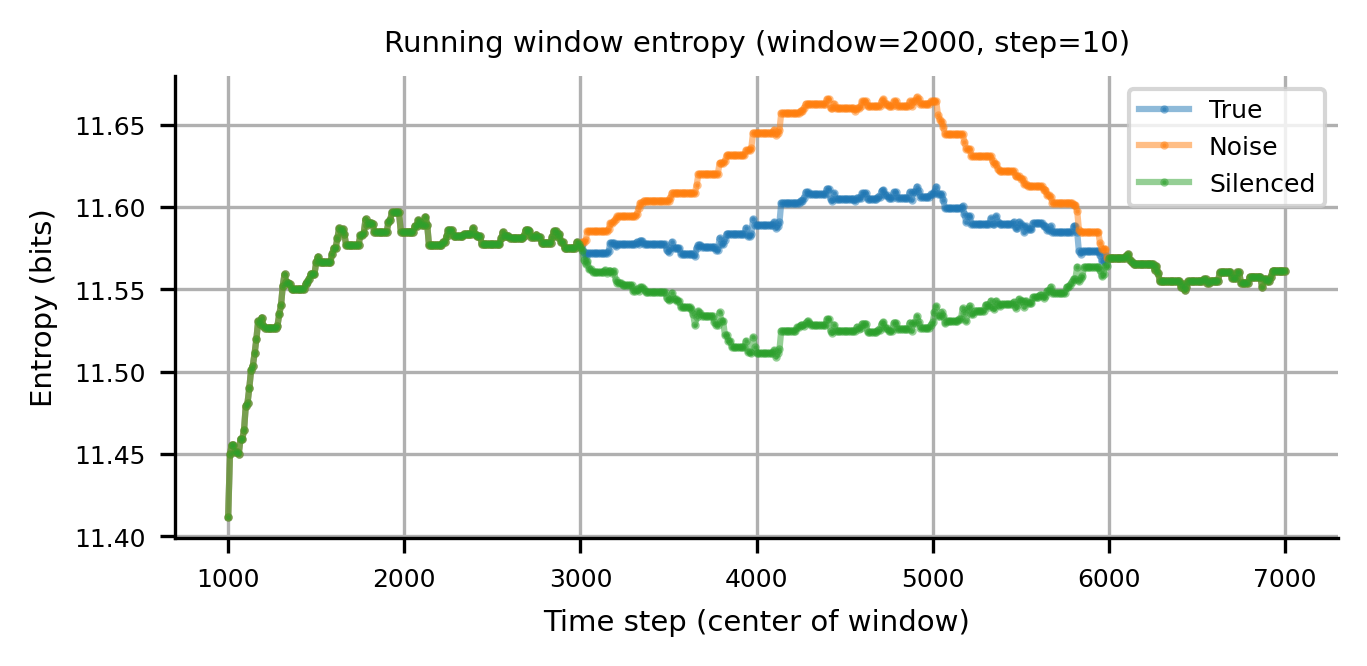

In [74]:
# Plot
plt.figure(figsize=(5,2))
plt.plot(times, entropies, marker='o', markersize=1,  alpha=0.5, label='True')
plt.plot(times, n_entropies, marker='o', markersize=1, alpha=0.5, label='Noise')
plt.plot(times, s_entropies, marker='o', markersize=1, alpha=0.5, label='Silenced')
plt.xlabel("Time step (center of window)")
plt.ylabel("Entropy (bits)")
plt.title(f"Running window entropy (window={window_size}, step={step_size})")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plot_raster(A_noisy, neurons, final_state.W, T_total=T)
plt.show()

In [78]:
import jax

In [81]:
jax.devices("cpu")[0]

CpuDevice(id=0)